# **6. Спектральная кластеризация**

## Данный тип кластеризации использует собственные значения (спектр) матрицы сходства данных, чтобы снизить размерность данных и далее провести кластеризацию.

### Более подробно со спектром вы познакомитесь, когда будете изучать линейную алгебру.

### Алгоритм спектральной кластеризации состоит из **четырёх шагов:**

1. На первом шаге мы создаём граф, количество вершин которого равняется количеству объектов в датасете.

Рёбра графа, соединяющие две вершины, будут содержать информацию о схожести двух объектов, находящихся в вершине.

Информацию о схожести вершин записываем в матрицу, строки и столбцы которой — это вершины, а в ячейку записана схожесть двух вершин:

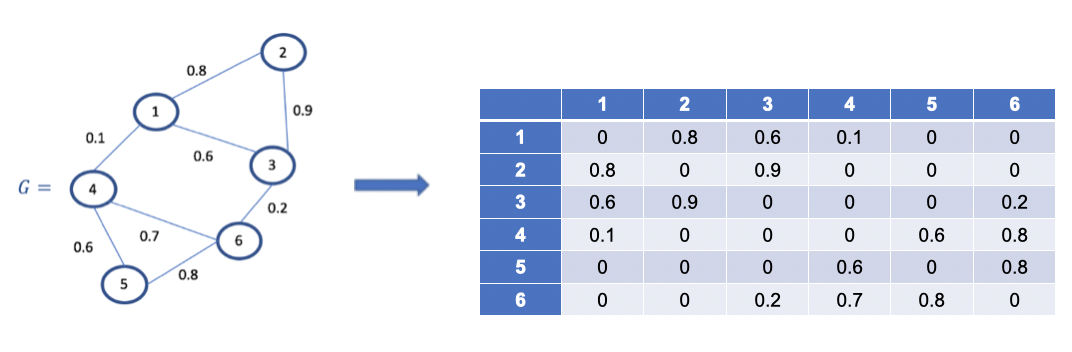

2. После этого проводим некоторые математические преобразования этой матрицы. Это нужно для того, чтобы далее мы могли описать вершину графа не шестью признаками, а всего одним:

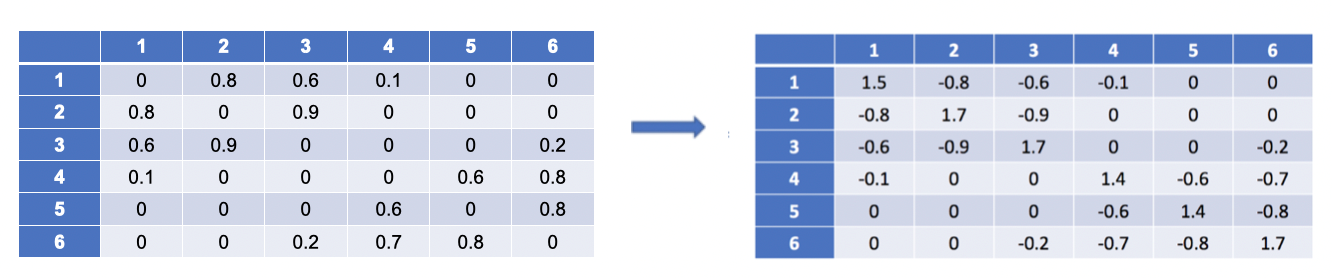

3. Далее уменьшаем размерность данных.

Сейчас одна вершина описывается шестью признаками, а значит, если проводить кластеризацию этих данных, кластеризация будет в шестимерном пространстве. С помощью подходов понижения размерности мы можем уменьшить количество признаков, описывающих вершину. На данный момент вникать в суть преобразований нам не нужно (в одном из следующих юнитов этого модуля мы разберём эту задачу более подробно) — сейчас важно понять саму идею преобразования, а также то, что до понижения размерности мы описывали одну вершину графа шестью признаками, а после преобразования стали описывать её одним признаком:

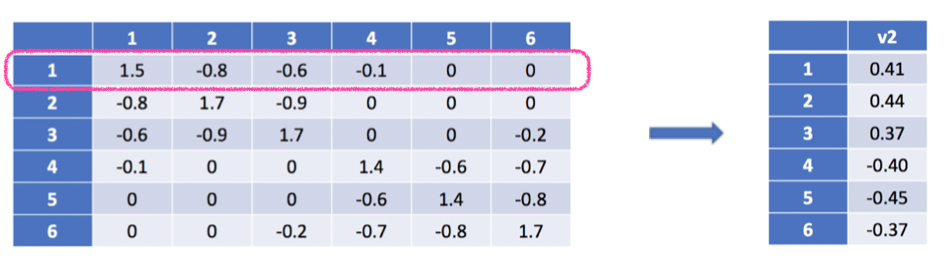

Теперь одна вершина описывается одним признаком.

4. Далее проводим кластеризацию матрицы с уменьшенной размерностью.

Основываясь на значениях признаков v2, мы можем определить вершины 1, 2 и 3 в один кластер, а вершины 4, 5, 6 — в другой. То, что разные вершины стали принадлежать к разным кластерам, можно визуализировать следующим образом:

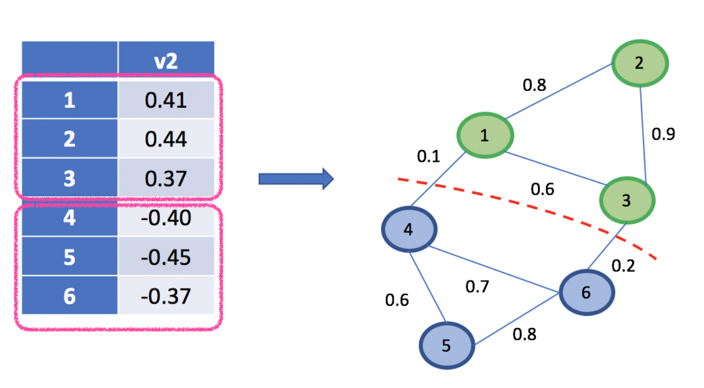

Таким образом, мы «разрезаем» исходный граф на два более маленьких графа. Каждый подграф — это отдельный кластер. Мы разрезаем граф так, чтобы похожие вершины оказываются в одном подграфе, а непохожие — в другом.

В самом начале мы не могли так разрезать граф, так как было непонятно, как разделить его так, чтобы похожие вершины оказались в одном кластере. Применив математические преобразования, мы смогли это сделать и таким образом кластеризовали наши данные.

# ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ СПЕКТРАЛЬНАЯ КЛАСТЕРИЗАЦИЯ?

Данный метод широко используется для сегментации изображений. В данном случае вершины графа — это пиксели изображения.

Например, если у нас есть зашумлённая картинка (ниже слева), на которой нужно сегментировать изображение и выделить разные кластеры, то спектральная кластеризация отлично подойдёт для такой задачи. Результаты сегментации можно наблюдать на картинке справа:

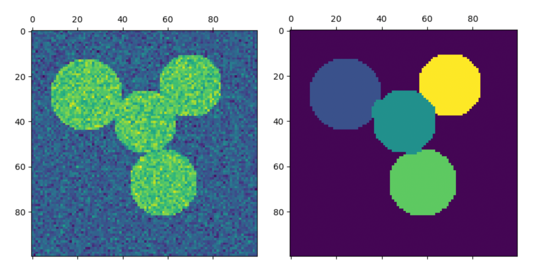

При желании вы можете повторить этот эксперимент самостоятельно.

# КАК ЗАПУСТИТЬ СПЕКТРАЛЬНУЮ КЛАСТЕРИЗАЦИЮ?

Рассмотрим это на нашем примере датасета с покемонами:

In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('data/pokemon.csv')

In [2]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

In [3]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

Основные параметры **SpectralClustering:**

+ n_clusters — количество кластеров; по умолчанию — 8.
+ random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску необходимо передать какое-то число.

Визуализируем результаты:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


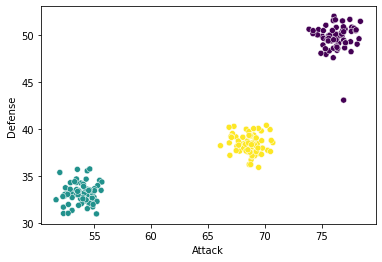

In [4]:
sns.scatterplot(df.Attack, df.Defense, c=spectral_predictions)

Для четырёх кластеров:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


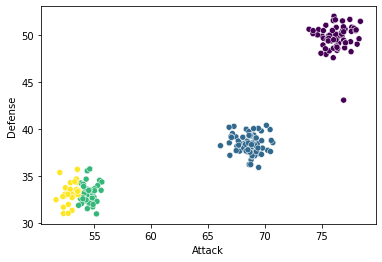

In [5]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering_1 = SpectralClustering(n_clusters=4, random_state=42)

spectral_clustering_1.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions_1 = spectral_clustering_1.labels_

sns.scatterplot(df.Attack, df.Defense, c=spectral_predictions_1)

### Как мы можем заметить, спектральная кластеризация так же, как и другие типы кластеризации, не справляется с выбросами и не выделяет их в отдельный кластер. К сожалению, этот недостаток алгоритма нельзя исправить.

# ПРЕИМУЩЕСТВА И НЕДОСТАТКИ СПЕКТРАЛЬНОЙ КЛАСТЕРИЗАЦИИ

## ПРЕИМУЩЕСТВА

+ Подходит для кластеризации данных с большим количеством признаков, так как использует технику понижения размерности.
+ Эффективна для кластеризации разрежённых данных.
+ Хорошо работает на практически любых распределениях данных. На рисунке ниже представлены результаты кластеризации данных с разным распределением признаков:

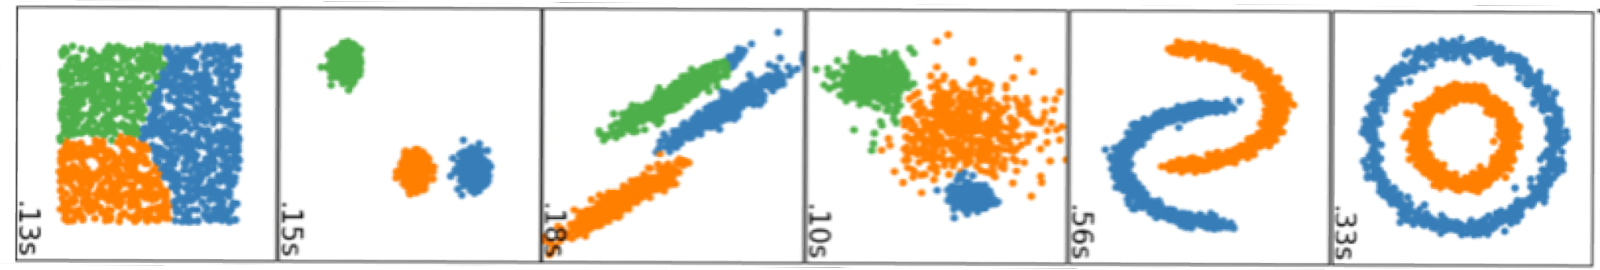

Алгоритм показал хорошие результаты во всех случаях, за исключением данных в форме вытянутого эллипса (столбец 3).

## НЕДОСТАТКИ

+ Нужно заранее задавать количество кластеров.
+ Подходит для задач сбалансированной классификации, то есть количество точек между кластерами не сильно отличается.

## Задание 6.1

Какой метод кластеризации лучше не выбирать, если данные несбалансированы и количество объектов, принадлежащих к кластерам, сильно отличается?

+ Спектральная кластеризация

## Задание 6.2

Количество кластеров не нужно задавать для...

+ Верного ответа нет

Минус всех перечисленных методов кластеризации в том, что необходимо заранее задавать количество кластеров.

## Задание 6.3

Какое из утверждений описывает спектральную кластеризацию?

+ Сначала снижается размерность данных, а затем проводится кластеризация, например алгоритмом k-means.